In [1]:
import pandas as pd
from hanziconv import HanziConv

import jieba
import jieba.posseg as pseg
import jieba.analyse

In [2]:
df = pd.read_csv('../data/text.csv')

In [4]:
df.head()
print(len(df))

30388146


## clean data

### 去掉空值欄位

In [11]:
df_change = df.dropna(how='any',axis=0) 
len(df_change)

30348617

### 去掉有 https 開頭

In [13]:
df_change = df_change[df_change['text'].str.contains("https|Britain")== False]
len(df_change)

29254229

In [21]:
df_change = df_change[df_change['text'].str.contains("http|Britain")== False]
len(df_change)

29184252

### 清除系統使用上的文字

In [14]:
mask = df_change['text'].str.contains("0011")
df_change = df_change[~mask]
len(df_change)

29246749

In [15]:
mask = df_change['text'].str.contains("0088")
df_change = df_change[~mask]
len(df_change)

29240114

In [27]:
mask = df_change['text'].str.contains("0022")
df_change = df_change[~mask]
len(df_change)

29183196

In [29]:
mask = df_change['text'].str.contains("0055")
df_change = df_change[~mask]
len(df_change)

29180990

In [35]:
mask = df_change['text'].str.contains("00leave")
df_change = df_change[~mask]
len(df_change)

28845025

In [37]:
df_change = df_change.reset_index(drop=True)

In [38]:
df_million = df_change.head(1000000)

In [39]:
df_million.to_csv("../data/df_million.csv")

## transform time

In [4]:
df_small['time'][0]

1471639945495.0

In [5]:
from datetime import datetime
datetime.fromtimestamp(1471639945495.0/1000.0)

datetime.datetime(2016, 8, 19, 20, 52, 25, 495000)

In [31]:
for i in range(len(df_small)):
    print(datetime.fromtimestamp(int(df_small['time'][i]/1000.0)).strftime('%Y-%m-%d %H:%M:%S'))


2016-08-19 20:52:25
2016-08-19 21:48:01
2016-08-19 21:48:03
2016-08-19 21:48:15
2016-08-19 21:48:23
2016-08-19 21:48:47
2016-08-19 21:48:51
2016-08-19 21:48:54
2016-08-19 21:48:54
2016-08-19 21:49:10
2016-08-19 21:49:11
2016-08-19 21:49:26
2016-08-19 21:49:38
2016-08-19 21:49:48
2016-08-19 21:49:51
2016-08-19 21:49:52
2016-08-19 21:50:01
2016-08-19 21:50:19
2016-08-19 21:50:28
2016-08-19 21:50:40


## 整理資料 清除空值及 '00leave'

In [4]:
df_small = df.head(100000)
df_small.head()

from                                 to  \
0  ud4097fbb4471c8c54512814bf0182e03  u84fa1e46e99df373e0f978c2ba274f9a   
1  ud4097fbb4471c8c54512814bf0182e03  u96e826dccd3c9db56d684a5ddffc3154   
2  u96e826dccd3c9db56d684a5ddffc3154  ud4097fbb4471c8c54512814bf0182e03   
3  ud4097fbb4471c8c54512814bf0182e03  u96e826dccd3c9db56d684a5ddffc3154   
4  u96e826dccd3c9db56d684a5ddffc3154  ud4097fbb4471c8c54512814bf0182e03   

         text                                  room          time  
0          wd  8aee77a7-1d90-4d0f-b3c3-3f7b94a90e36  1.471640e+12  
1          嗨嗨  fe214cfc-22d1-4736-92e7-d133190142b8  1.471643e+12  
2          蛤？  fe214cfc-22d1-4736-92e7-d133190142b8  1.471643e+12  
3  你是第二個使用者ＱＱ  fe214cfc-22d1-4736-92e7-d133190142b8  1.471643e+12  
4     哈哈哈哈哈哈哈  fe214cfc-22d1-4736-92e7-d133190142b8  1.471643e+12

In [16]:
df_small.count()

from    20000
to      20000
text    19939
room    20000
time    20000
dtype: int64

## 清除text欄位是空值的row

In [5]:
df_small = df_small.dropna(how='any',axis=0) 
# df_small.head(10)

In [6]:
df_small.count()
df_small = df_small.reset_index(drop=True)
# df_small.head(20)

In [7]:
count = 0
for i in range(len(df_small)):
    if(df_small['text'][i]=="00leave"):
#         print(i)
        count+=1

        
print(count)

4372


In [8]:
count = 0
for i in range(len(df_small)):
    if(type(df_small['text'][i])!= float and df_small['text'][i].find("https://whosdiary.com/")):
#         print(i)
        count+=1

        
print(count)

99927


## 清除 text 欄位是 "00leave" 的row

In [22]:
print(df_small.count())
df_small = df_small[ df_small['text']!="00leave" ]

from    99931
to      99931
text    99931
room    99931
time    99931
dtype: int64


In [23]:
df_small.count()

from    95559
to      95559
text    95559
room    95559
time    95559
dtype: int64

In [24]:
df_small = df_small.reset_index(drop=True)
len(df_small)


95559

In [25]:
len(df_small)
# df_small['text'].isin(['https://whosdiary.com/'])

95559

## 清除 text 欄位是含有 'https://whosdiary' 

In [26]:
mask = df_small['text'].str.contains("https://whosdiary")
df_small = df_small[~mask]
df_small = df_small.reset_index(drop=True)
len(df_small)


95496

In [27]:
mask2 = df_small['text'].str.contains("http://whosdiary")
df_small = df_small[~mask2]
len(df_small)

93009

In [28]:
df_small = df_small.reset_index(drop=True)

In [29]:
df_small_output = df_small[['from','text']]

In [30]:
df_small_output.head(10)
len(df_small_output)

93009

In [17]:
df_small_output.to_csv("../data/df_small.csv")

# df

In [2]:
df = pd.read_csv('data/text.csv')

In [11]:
df_change = df.dropna(how='any',axis=0) 
df_change.count()

from    30348617
to      30348617
text    30348617
room    30348617
time    30348617
dtype: int64

In [12]:
df_change = df_change[ df_change['text']!="00leave" ]
df_change.count()

from    30012652
to      30012652
text    30012652
room    30012652
time    30012652
dtype: int64

In [13]:
mask = df_change['text'].str.contains("https://whosdiary")
df_change = df_change[~mask]
df_change.count()

from    28918284
to      28918284
text    28918284
room    28918284
time    28918284
dtype: int64

In [14]:
mask2 = df_change['text'].str.contains("http://whosdiary")
df_change = df_change[~mask2]
df_change = df_change.reset_index(drop=True)
df_change.count()

from    28862368
to      28862368
text    28862368
room    28862368
time    28862368
dtype: int64

# 分析

In [31]:
fileTrainSeg = []

In [ ]:
# for i in range(len(df)):
#     seg_list = jieba.cut(df['text'][i])  # 默认是精确模式
# #     print("/".join(seg_list))
#     fileTrainSeg.append(['/'.join(list(jieba.cut(str(df['text'][i]),cut_all=False)))])
#     if i % 50000 == 0 :
#         print(i)

In [7]:
fileSegWordDonePath ='corpusSegDone.txt'
with open(fileSegWordDonePath,'w') as fW:
    for i in range(len(fileTrainSeg)):
        fW.write(fileTrainSeg[i][0])
        fW.write('\n')
#         print(fileTrainSeg[i][0])

In [8]:
def PrintListChinese(list):
    for i in range(len(list)):
        print(list[i],)
PrintListChinese(fileTrainSeg[19])

貼圖 我 直接 關掉 Ｘ Ｄ


In [9]:
import word2vec
# jieba分詞轉word2vec向量
word2vec.word2vec('corpusSegDone.txt', 'corpusWord2Vec.bin', size=300,verbose=True)

Starting training using file corpusSegDone.txt
Vocab size: 158
Words in train file: 3801


In [10]:
model = word2vec.load('corpusWord2Vec.bin')
print(model.vectors)

[[ 0.08015626  0.08850129 -0.07670335 ..., -0.02626957 -0.03316621
   0.0614953 ]
 [ 0.01532638 -0.05874425 -0.03078251 ...,  0.137457   -0.03374089
  -0.11269254]
 [ 0.03876591 -0.07426252 -0.03271443 ...,  0.15078014 -0.01539938
  -0.09851675]
 ..., 
 [ 0.02416539 -0.08729621 -0.0172144  ...,  0.13408722 -0.03411518
  -0.08747852]
 [ 0.03685596 -0.06128523 -0.0291411  ...,  0.14502333 -0.0158358
  -0.11901269]
 [ 0.04190627 -0.05130509 -0.03530375 ...,  0.13819341 -0.04790676
  -0.07296997]]


In [11]:
for i in range(0,24):
    print(model.vocab[i])

</s>
😂
我
你
的
-
/
是
？
█
了
啊
哈哈哈
有
嗯
喔
:
嗎
好
這個
.
在
很
▄


In [12]:
model = word2vec.load('corpusWord2Vec.bin')
indexes = model.cosine(u'在') # 此字詞有出現在corpusWord2Vec.bin當中
for index in indexes[0]:
    print(model.vocab[index])

我
~
就
/
知道
了
他
.
你
聊天


In [13]:
indexes = model.cosine(u'我')
for index in indexes[0]:
    print(model.vocab[index])

~
就
/
知道
了
聊天
com
3001
他
:


In [30]:
index1,metrics1 = model.cosine(u'我')
index2,metrics2 = model.cosine(u'聊天')
index3,metrics3 = model.cosine(u'知道')
index4,metrics4 = model.cosine(u'錢')
index5,metrics5 = model.cosine(u'可以')

In [31]:
import numpy as np
index01 = np.where(model.vocab == u'我')
index02 = np.where(model.vocab == u'聊天')
index03 = np.where(model.vocab == u'知道')
index04 = np.where(model.vocab == u'錢')
index05 = np.where(model.vocab == u'可以')

In [32]:
index1 = np.append(index1,index01)
index2 = np.append(index2,index02)
index3 = np.append(index3,index03)
index4 = np.append(index4,index04)
index5 = np.append(index5,index05)

In [33]:
import numpy as np
# 視覺化套件
import matplotlib
import matplotlib.pyplot as plt
# 主成分因子
from sklearn.decomposition import PCA

In [34]:
rawWordVec = model.vectors
# 將原本300維向量空間降為2維
X_reduced = PCA(n_components=2).fit_transform(rawWordVec)

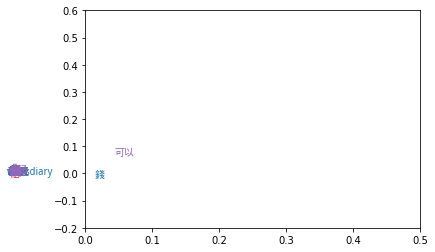

In [35]:
zhfont = matplotlib.font_manager.FontProperties(fname='/home/tp6han/gp/graguation_project/wqy-microhei.ttc')
# 畫圖
fig = plt.figure()
ax = fig.add_subplot(111)
 
for i in index1:
    ax.text(X_reduced[i][0],X_reduced[i][1],model.vocab[i], fontproperties=zhfont,color='C3')
for i in index2:
    ax.text(X_reduced[i][0],X_reduced[i][1],model.vocab[i], fontproperties = zhfont,color= 'C1')
for i in index3:
    ax.text(X_reduced[i][0],X_reduced[i][1],model.vocab[i], fontproperties=zhfont,color='C7')
for i in index4:
    ax.text(X_reduced[i][0],X_reduced[i][1],model.vocab[i], fontproperties=zhfont,color='C0')
for i in index5:
    ax.text(X_reduced[i][0],X_reduced[i][1],model.vocab[i], fontproperties=zhfont,color='C4')
ax.axis([0,0.5,-0.2,0.6])
plt.figure(figsize=(60,60))
plt.show()